<table class="table table-bordered">
    <tr>
    <th style="text-align:center;"><font size="4"> <br/>IS217 - Iris Dataset <br />Classification</font></th>
    </tr>
</table> 

### About Iris data
This data set consists of 50 samples from each of the three species of Iris flowers (<b>Iris setosa, Iris virginica</b> and <b>Iris versicolor</b>).<br>
For each sample the `length` and the `width` of the `sepals` and `petals`, in centimeters are recorded as features. <br>

<img align="left" src='https://drive.google.com/uc?export=view&id=1OmNrukzgJCfSiW_0B2Rp06BKguEMGClk' style="width: 700px; height: 250px;">



### Objective of the study
Use the classification techniques on the Iris dataset to be able to `classify` and `predict` the species.

### What is covered in the notebook:

 1. Reading <b>Iris</b> data from the web into a Pandas `DataFrame`
 2. Inspect the data and basic properties (EDA)
 3. Use Sample plots to show the relationship between variables
 4. Fit a DecisionTreeClassifier from `sklearn` library
 5. Visualise the `decision tree` splitting rules
 6. Printing `accuracy`, `confusion matrix`, and `classification report`.


### Import the required libraries

In [25]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read data from URL into local storage

In [26]:
# Where we will download dataset from
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# The column names of our dataset. We need this because the website does not have these column names in the downloaded file.
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Read dataset from URL
data = pd.read_csv(url, names = col_names)

# Show datatype of dataset
print("data is of type: ",type(data))

data is of type:  <class 'pandas.core.frame.DataFrame'>


In [27]:
# Create a CSV file containing the dataset
data.to_csv('iris.csv', index = False)

In [28]:
# Show the first 5 rows in the dataset
# Write your code here:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# Show the last 5 rows in the dataset
data.tail()
# Write your code here:

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 2. EDA

### Checking for basic descriptive characteristics and missing values

In [30]:
# How many missing values are there?

# Write your code here:
data.info()          # option 1
data.isnull().sum()  # option 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### View Summary Statistics

In [31]:
# Show statistics for each numeric variable

# 'find standard deviation for following value'

# Write your code here:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Print the unique values for the categorical variable `class`

In [32]:
# Write your code here:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Print the frequency for each value in the categorical variable `class`

In [34]:
# Write your code here:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### 3. Let us study the relationship among variables with some visualisations
### a) Scatter plot of Petal Length vs Petal Width

In [35]:
# Import library for visusalization
import seaborn as sns

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

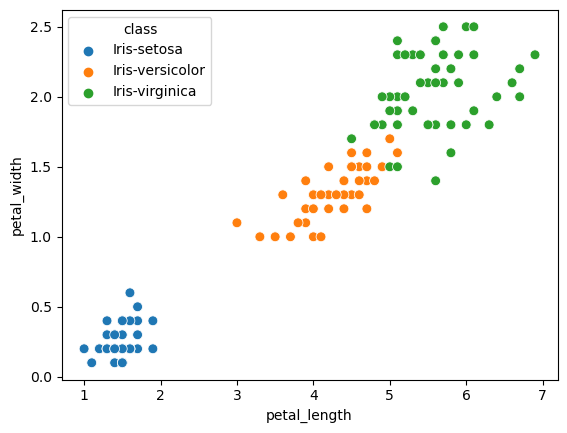

In [36]:
# Show scatter plot of petal_length (x-axis) vs petal_width (y-axis), with class shown as color.
# "s=50" sets the size of the dots.
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['class'], s=50)

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoa2dncC1mOFdhSFU' style="width: 80px; height: 80px;"><br /><br />
<b> Do we see natural grouping of points based on petal width and petal length? </b>

Put your answer here:

better variables give more:
- higher information gain
- lower entropy
- less impurity
- more homogenity in split sets
- splitting datasats into small parts where its easier to classify into small groups
- better variables tend to top of the tree


Entropy in the beginning high because it could be every flower in dataset


    

### b) Scatter plot of Sepal Length vs Sepal Width

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

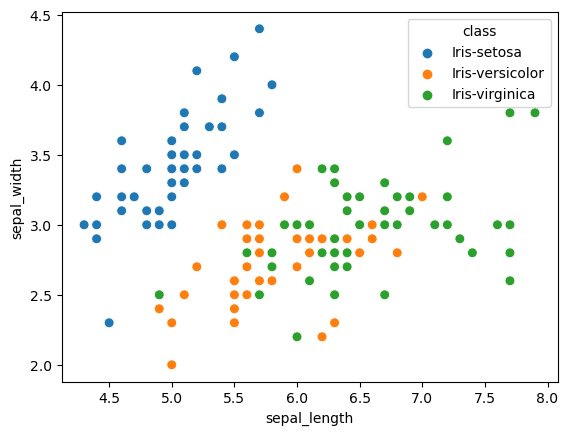

In [38]:
# Show scatter plot of Sepal Length vs Sepal Width
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'], hue=data['class'], s=50)

<img align="left" src='https://drive.google.com/uc?export=view&id=0B08uY8vosNfoa2dncC1mOFdhSFU' style="width: 80px; height: 80px;"><br /><br />
<b> Which variables do you think differentiate the species better? </b>

Put your answer here:
variables 

    

    

### 4. Fitting the Decision tree
 - Import the sklearn library to instantiate a classifier object
 - Split the dataset into train and test
 - Fit the model and make test predictions
 - Print accuracy score
 - Print confusion matrix



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [39]:
# Import library to use Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Import library to split data into training and test sets
from sklearn.model_selection import train_test_split

# Import library to measure performance
from sklearn.metrics import accuracy_score

In [40]:
# Get predictor variables X from dataset
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Get target variable y from dataset
y = data['class']

`train_test_split()` API: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [42]:
# Create training and test sets, split up into predictor variables and target varaibles,
# with 20% of the dataset to be used for testing.
# "stratify = y" means we maintain proportion of classes in both training and test sets

# 150 rows in entire dataset
# 50, 50, 50 for each class

# test = 20%
# 30 rows in test set
# 120 rows in training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 1)

In [44]:
# Show first 5 rows of X_train
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
47,4.6,3.2,1.4,0.2
141,6.9,3.1,5.1,2.3
90,5.5,2.6,4.4,1.2
64,5.6,2.9,3.6,1.3


In [45]:
# Show first 5 rows of y_train
y_train.head()

21         Iris-setosa
47         Iris-setosa
141     Iris-virginica
90     Iris-versicolor
64     Iris-versicolor
Name: class, dtype: object

In [46]:
# Show dimensions (number of rows and columns) of X_train
X_train.shape

(120, 4)

In [47]:
# Show dimensions (number of rows and columns) of y_train
y_train.shape

(120,)

In [48]:
# Show dimensions (number of rows and columns) of X_test
X_test.shape

(30, 4)

In [49]:
# Show dimensions (number of rows and columns) of y_test
y_test.shape

(30,)

`DecisionTreeClassifier` API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [53]:
# Build a Decision Tree model,
# using entropy as the measure for choosing nodes and branches,
# and with a maximum tree depth of 3 (i.e. 3 branches deep)
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)

`fit()` function API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

In [54]:
# Give training set for the DT to learn from
dt.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [58]:
# Give the test set to the DT, which returns its predicted answers
y_pred = dt.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

### 5. Visualising the Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

The below functions generate a graphical representation of the decison tree using the __'Graphviz'__ package. 
<br/>A graph is generated and written to an output file in 'DOT' format, which is then rendered and saved to a PNG format. DOT is a graph description language.

Parameters values can be set to render customised decision tree -<br>
e.g : `max_depth` - Here we have set it to 3. If we leave it to `default = None`, a full tree is generated.
<br/>Refer to the link above for details on other options that can be set.


### For executing the code below, you will need to install pydotplus.
#### In the Anaconda Prompt window (for Windows OS) or Terminal window (for Mac OS), type: <br />
`conda install -c conda-forge pydotplus`

In [ ]:
# Import libraries to visualize DT
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image

# Names of features (independent variables)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Generate the visualization of the DT, and write into the file 'irisTree.png'
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                    feature_names = feature_cols,  
                    filled = True, rounded = True,  
                    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('irisTree.png') 
Image(graph.create_png())

### How to read the produced diagram:
### At the top of each non-leaf node, the expression is the question asked at that node,
### e.g. "petal_width <= 0.75". This question is used to further split up the data in the
### training set, to reach the nodes lower in the tree.
### Next line is the entropy at that node.
### Next line is the number of samples in the training set when reaching that node.
### Next line is the number of samples in each class when reaching that node.

### If you can't install pydotplus, alternatively, you can use the below code to visualize the decision tree. 




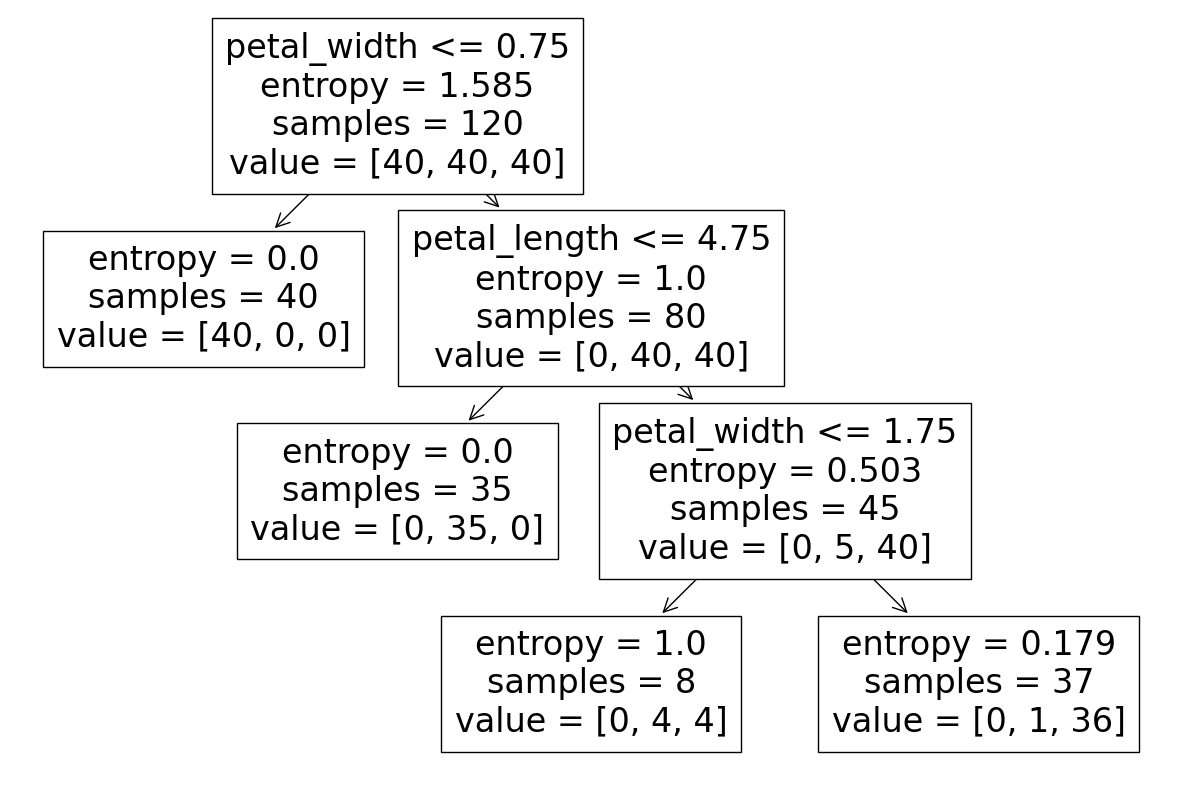

In [60]:
# Import libraries to show DT as a plot
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Names of features (independent variables)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Generate a plot showing the DT
plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train), feature_names = feature_cols)
plt.show()

### How to read the produced diagram:
### At the top of each non-leaf node, the expression is the question asked at that node,
### e.g. "petal_width <= 0.75". This question is used to further split up the data in the
### training set, to reach the nodes lower in the tree.
### Next line is the entropy at that node.
### Next line is the number of samples in the training set when reaching that node.
### Next line is the number of samples in each class when reaching that node.

# left is always true, right is always false

right leaf: 36 / (36+1) --> confidence that accurate, right answer


In [62]:
# Show all class names
dt.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 6. Accuracy, Confusion Matrix and Classification Report

### a) Printing the Prediction Accuracy
<b>In classification Accuracy is calculated as the (sum of correct predictions / total number of predictions) <b/>

In [63]:
# Show accuracy of labels predicted, rounded to 2 decimal places
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,2)

0.97

### b) Printing the Confusion Matrix

The confusion Matrix is simply a square matrix that reports the counts of <b>`true positive, true negative, false positive and false negative`</b> predictions of a classifier.

https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

In [64]:
# Import library to show confusion matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(cnf_matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [65]:
# Show confusion matrix with each row and column labelled
confusion_test_df = pd.DataFrame(cnf_matrix, columns = [ 'Iris-setosa_pred', 'Iris-versicolor_pred', 'Iris-virginica-pred']\
                      , index =  [ 'Iris-setosa_act', 'Iris-versicolor_act', 'Iris-virginica_act'])
confusion_test_df

,Iris-setosa_pred,Iris-versicolor_pred,Iris-virginica-pred
Iris-setosa_act,10,0,0
Iris-versicolor_act,0,10,0
Iris-virginica_act,0,1,9


### c) Printing the Classification Report

In [67]:
# Import library to generate classification report
from sklearn.metrics import classification_report

# Get all possible values for the categorical variable 'class'
class_labels = data['class'].unique()

# Show classification report
print(classification_report(y_test, y_pred, target_names=class_labels))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Variable Importance <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [68]:
# Show the GINI importance of each feature
vi = dt.feature_importances_
print(vi)

[0.         0.         0.32668254 0.67331746]


In [69]:
# Show the GINI importance of each feature in an easier to read format
n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

sepal_length   : 0.0
sepal_width   : 0.0
petal_length   : 0.327
petal_width   : 0.673


**Optional code - Plotting the feature importance**

<AxesSubplot:>

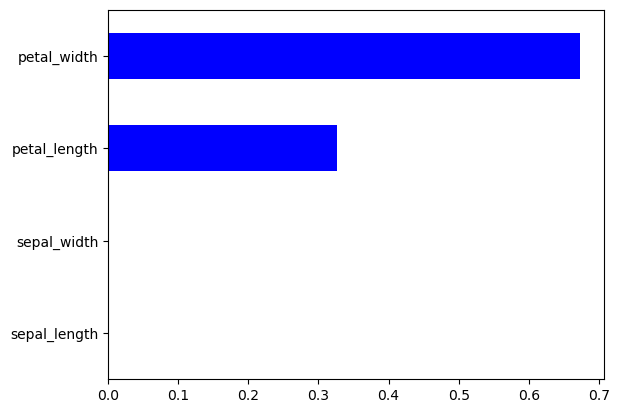

In [70]:
# Create a Series with the feature importances
feat_importances = pd.Series(vi, index = feature_cols)

# Sort the Series
sorted_feat_importances = feat_importances.sort_values()

# Create a horizontal bar plot showing feature importance
sorted_feat_importances.plot(kind='barh', color='blue')